# Installing and mporting essentials

In [ ]:
!pip install yfinance
!pip install talib-binary
url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h516909a_0.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py37ha21ca33_2.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.7/dist-packages/ lib/python3.7/site-packages/talib --strip-components=3
import talib

In [ ]:
# Mathematical functions 
import math 
# Fundamental package for scientific computing with Python
import numpy as np 
# Additional functions for analysing and manipulating data
import pandas as pd 
# Date Functions
from datetime import date, timedelta, datetime
# This function adds plotting functions for calender dates
from pandas.plotting import register_matplotlib_converters
# Important package for visualization - we use this to plot the market data
import matplotlib.pyplot as plt 
# Formatting dates
import matplotlib.dates as mdates
# Packages for measuring model performance / errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Deep learning library, used for neural networks
from keras.models import Sequential 
# Deep learning classes for recurrent and regular densely-connected layers
from keras.layers import LSTM, Dense, Dropout
# EarlyStopping during model training
from keras.callbacks import EarlyStopping
# This Scaler removes the median and scales the data according to the quantile range to normalize the price data 
from sklearn.preprocessing import RobustScaler
# For detailed configuration of the optimizer 
#from keras.optimizers import Adam
import seaborn as sns
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
import talib as talib
from keras.models import load_model
import pickle
from sklearn.preprocessing import MinMaxScaler
# Load libraries
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
#Additional Libraries 
import json  
import zipfile
import os.path
import sys
##extracting RSS feed data
import pandas as pd

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Extraction and Data Pre processing

In [ ]:
df = yf.download(
                      "^NDXT", 
                      start='2010-01-01', 
                      end='2021-12-31', 
                      progress=False,
)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3019 entries, 2010-01-04 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3019 non-null   float64
 1   High       3019 non-null   float64
 2   Low        3019 non-null   float64
 3   Close      3019 non-null   float64
 4   Adj Close  3019 non-null   float64
 5   Volume     3019 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 165.1 KB


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1152.609985,1160.510010,1152.280029,1156.650024,1156.650024,0
2010-01-05,1157.939941,1160.280029,1149.000000,1157.060059,1157.060059,0
2010-01-06,1156.040039,1161.109985,1148.790039,1151.859985,1151.859985,0
2010-01-07,1147.140015,1149.630005,1138.199951,1142.260010,1142.260010,0
2010-01-08,1139.920044,1155.839966,1138.160034,1154.760010,1154.760010,0
...,...,...,...,...,...,...
2021-12-23,9523.299805,9619.459961,9509.780273,9584.750000,9584.750000,304500
2021-12-27,9620.219727,9766.719727,9620.219727,9764.900391,9764.900391,310700
2021-12-28,9790.929688,9793.419922,9629.860352,9657.730469,9657.730469,0


In [ ]:
df = df.dropna()

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,FB RETURN,FB close,AAPL RETURN,AAPL close,...,^DJI RETURN,^DJI close,^NSEI RETURN,^NSEI close,^HSI RETURN,^HSI close,DVN RETURN,DVN close,MRO RETURN,MRO close
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-22,1342.500000,1346.459961,1329.089966,1337.569946,1337.569946,0,-0.089039,31.000000,-0.007679,19.891787,...,-0.000134,12502.809570,-0.006327,4860.500000,0.006174,19039.150391,-0.020194,61.619999,-0.007749,24.330000
2012-05-23,1333.829956,1343.099976,1311.969971,1339.969971,1339.969971,0,0.032258,32.000000,0.024400,20.377144,...,-0.000533,12496.150391,-0.005113,4835.649902,-0.013286,18786.189453,-0.007465,61.160000,0.007809,24.520000
2012-05-24,1337.180054,1337.810059,1308.810059,1317.589966,1317.589966,0,0.032187,33.029999,-0.009184,20.190001,...,0.002689,12529.750000,0.017733,4921.399902,-0.006376,18666.400391,-0.011936,60.430000,0.014682,24.879999
2012-05-25,1318.180054,1330.439941,1318.170044,1324.310059,1324.310059,0,-0.033909,31.910000,-0.005360,20.081785,...,-0.005979,12454.830078,-0.000203,4920.399902,0.002518,18713.410156,-0.006785,60.020000,0.016479,25.290001
2012-05-29,1330.599976,1349.819946,1329.689941,1342.479980,1342.479980,0,-0.096208,28.840000,0.017749,20.438213,...,0.010105,12580.690430,0.000893,4990.100098,0.013535,19055.460938,0.018827,61.150002,0.009094,25.520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-22,9391.730469,9510.290039,9354.349609,9508.169922,9508.169922,322800,-0.011221,330.450012,0.015319,175.639999,...,0.007359,35753.890625,0.011007,16955.449219,0.005703,23102.330078,0.023723,42.290001,0.017767,16.040001
2021-12-23,9523.299805,9619.459961,9509.780273,9584.750000,9584.750000,304500,0.014495,335.239990,0.003644,176.279999,...,0.005501,35950.558594,0.006909,17072.599609,0.003952,23193.640625,-0.005675,42.049999,-0.002494,16.000000
2021-12-28,9790.929688,9793.419922,9629.860352,9657.730469,9657.730469,0,0.000116,346.220001,-0.005767,179.289993,...,0.002640,36398.210938,0.008603,17233.250000,0.002446,23280.560547,-0.002466,44.500000,-0.004831,16.480000


In [ ]:
df1 = pd.DataFrame()

In [ ]:
tickers = ["FB", 'AAPL','MSFT','BRK-A','TSLA', 'AMZN', 'GS', 'JPM', "MS", "NVDA","ADBE","AMD","CSCO","^NDX","^DJI","^NSEI","^HSI","DVN","MRO","^NDX"]

In [ ]:
for ticker in tickers: 
 temp = yf.download(ticker, 
                      start='2010-01-01', 
                      end='2021-12-31', 
                      progress=False,
                    ) 
 df1[ticker + ' RETURN'] = temp['Close'].pct_change()
 df1[ticker + ' close'] = temp['Close']

In [ ]:
df.corr()

In [ ]:
df = df.dropna()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(55,20))
plt.plot(df.corr())

plt.show()

In [ ]:
df['Return'] = df['Close'].pct_change()
df['ma21'] = df['Close'].rolling(window=21).mean().fillna(0)
df['ma180'] = df['Close'].rolling(window=180).mean().fillna(0)
df['ma365'] = df['Close'].rolling(window=365).mean().fillna(0)
df['eMA26'] = df['Close'].ewm(span = 26).mean().fillna(0)
df['eMA12'] = df['Close'].ewm(span = 12).mean().fillna(0)
df['MACD'] = df['eMA12'] - df['eMA26']
df['RSI'] = talib.RSI(df['Close'].values, timeperiod = 180)
df['HL'] = df['High'] - df['Low']
df['CO'] = df['Close'] - df['Open']
df['Cm_D_Ret'] = (1 + df["Return"]).cumprod()
window = 21
no_of_std = 2
rolling_mean = df['Close'].rolling(window).mean()
rolling_std = df['Close'].rolling(window).std()
df['bb_high'] = (rolling_mean + (rolling_std * no_of_std)).fillna(0)
df['bb_low'] = (rolling_mean - (rolling_std * no_of_std)).fillna(0)
df['momentum'] = df['Close'] - 1
df['wma'] = talib.WMA(df['Close'] , timeperiod=30)
df['TEMA'] = talib.TEMA(df['Close'] , timeperiod=30)
df['TRIMA'] = talib.TRIMA(df['Close'] , timeperiod=30)
df['DEMA'] = talib.DEMA(df['Close'] , timeperiod=30)
df['T3'] = talib.T3(df['Close'], timeperiod=5, vfactor=0)
df['cci'] = talib.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
df['ROC'] = talib.ROC(df['Close'], timeperiod=10)
df['Price_osc']= talib.PPO(df['Close'], fastperiod=12, slowperiod=26, matype=0)
df['Direction_mvmt_idx'] = talib.ADX(df['High'], df['Low'], df['Close'], timeperiod=14)
df['Abs_price_osc'] = talib.APO(df['Close'], fastperiod=12, slowperiod=26, matype=0)
df['Avg_T_range'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['slowk'], df['slowd'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
df['fastk'], df['fastd'] = talib.STOCHRSI(df['Close'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df['PLUS_DI'] = talib.PLUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)
df['PLUS_DM']= talib.PLUS_DM(df['High'], df['Low'], timeperiod=14)
df['MINUS_DM'] = talib.MINUS_DM(df['High'], df['Low'],  timeperiod=14)
df['MINUS_DI'] = talib.MINUS_DI(df['High'], df['Low'], df['Close'], timeperiod=14)

In [ ]:
basics = df[['High', 'Close' , 'Open' , 'High' , 'Return']]

In [ ]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,FB RETURN,FB close,AAPL RETURN,AAPL close,...,Abs_price_osc,Avg_T_range,slowk,slowd,fastk,fastd,PLUS_DI,PLUS_DM,MINUS_DM,MINUS_DI
Open,1.000000,0.999919,0.999875,0.999775,0.999775,0.774618,-0.005227,0.974022,0.021489,0.974551,...,0.267840,0.836628,0.045352,0.050761,0.007464,0.017306,0.172856,0.876503,0.725948,-0.067661
High,0.999919,1.000000,0.999848,0.999879,0.999879,0.776496,-0.002996,0.973836,0.023958,0.974816,...,0.264110,0.839771,0.044068,0.048578,0.010023,0.017245,0.170450,0.877920,0.729892,-0.065511
Low,0.999875,0.999848,1.000000,0.999897,0.999897,0.771606,-0.000588,0.974527,0.026280,0.974248,...,0.270003,0.833782,0.049681,0.053779,0.013583,0.020841,0.177171,0.876183,0.721150,-0.072210
Close,0.999775,0.999879,0.999897,1.000000,1.000000,0.773718,0.003147,0.974295,0.030799,0.974603,...,0.266978,0.836782,0.048535,0.051622,0.016079,0.020581,0.174644,0.877404,0.725162,-0.069855
Adj Close,0.999775,0.999879,0.999897,1.000000,1.000000,0.773718,0.003147,0.974295,0.030799,0.974603,...,0.266978,0.836782,0.048535,0.051622,0.016079,0.020581,0.174644,0.877404,0.725162,-0.069855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fastd,0.017306,0.017245,0.020841,0.020581,0.020581,-0.008049,0.124996,0.008808,0.163187,0.007647,...,-0.052685,0.017366,0.885895,0.712496,0.753761,1.000000,0.394400,0.134042,-0.104315,-0.405855
PLUS_DI,0.172856,0.170450,0.177171,0.174644,0.174644,0.058475,0.089125,0.129388,0.134746,0.120146,...,0.525988,-0.047544,0.620910,0.645823,0.290010,0.394400,1.000000,0.277599,-0.256810,-0.758422
PLUS_DM,0.876503,0.877920,0.876183,0.877404,0.877404,0.783873,0.044510,0.823219,0.072171,0.859522,...,0.280911,0.906639,0.158410,0.154100,0.106167,0.134042,0.277599,1.000000,0.734154,-0.154563
MINUS_DM,0.725948,0.729892,0.721150,0.725162,0.725162,0.740205,-0.047848,0.672541,-0.051126,0.723806,...,-0.221746,0.930141,-0.213865,-0.228314,-0.070937,-0.104315,-0.256810,0.734154,1.000000,0.351849


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.plot(df.corr())

plt.show()

Exploraotry Data Analysis

# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2012-05-22 to 2021-12-30
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Open                2196 non-null   float64
 1   High                2196 non-null   float64
 2   Low                 2196 non-null   float64
 3   Close               2196 non-null   float64
 4   Adj Close           2196 non-null   float64
 5   Volume              2196 non-null   int64  
 6   FB RETURN           2196 non-null   float64
 7   FB close            2196 non-null   float64
 8   AAPL RETURN         2196 non-null   float64
 9   AAPL close          2196 non-null   float64
 10  MSFT RETURN         2196 non-null   float64
 11  MSFT close          2196 non-null   float64
 12  BRK-A RETURN        2196 non-null   float64
 13  BRK-A close         2196 non-null   float64
 14  TSLA RETURN         2196 non-null   float64
 15  TSLA close          2196 non-null   f

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,FB RETURN,FB close,AAPL RETURN,AAPL close,...,Abs_price_osc,Avg_T_range,slowk,slowd,fastk,fastd,PLUS_DI,PLUS_DM,MINUS_DM,MINUS_DI
count,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,2196.000000,...,2171.000000,2182.000000,2188.000000,2188.000000,2176.000000,2.176000e+03,2182.000000,2183.000000,2183.000000,2182.000000
mean,3782.465654,3809.941119,3752.824041,3783.272736,3783.272736,82194.626594,0.000866,145.191548,0.000843,50.419434,...,26.067508,66.719946,61.448287,61.423418,56.026790,5.603281e+01,27.406388,248.212575,233.273212,24.528298
std,2165.002312,2182.842621,2143.583730,2164.385130,2164.385130,153943.520508,0.022819,89.006886,0.017812,39.099356,...,94.528027,55.139682,26.007452,23.925509,41.790596,3.311016e+01,7.379330,204.919138,213.012238,7.123194
min,1267.170044,1277.540039,1253.069946,1267.920044,1267.920044,0.000000,-0.189609,17.730000,-0.128647,14.001786,...,-594.914255,15.909658,1.782637,5.372330,0.000000,-1.539509e-13,6.133526,34.647571,20.781499,7.804041
25%,2163.567444,2179.460022,2152.144958,2165.237610,2165.237610,0.000000,-0.009532,75.445000,-0.007447,24.236875,...,-8.665968,28.206047,40.293779,42.195644,4.439680,2.793799e+01,22.014352,98.028293,85.848316,19.349445
50%,3248.229980,3264.184937,3227.360107,3244.489990,3244.489990,0.000000,0.000886,136.964996,0.000671,35.225000,...,22.318845,41.972525,65.686128,65.084828,65.196152,5.975450e+01,27.505571,159.280778,148.924085,23.341632
75%,4724.559937,4764.069946,4701.700073,4732.430054,4732.430054,0.000000,0.012106,189.320000,0.010320,55.119374,...,65.444998,92.192382,84.743602,82.398935,100.000000,8.708675e+01,32.739747,349.352613,319.743430,29.086092
max,9876.620117,9926.230469,9778.839844,9855.419922,9855.419922,764600.000000,0.296115,382.179993,0.119808,179.449997,...,353.351018,287.278504,99.874213,99.071027,100.000000,1.000000e+02,47.947528,1061.007511,1422.797061,60.682047


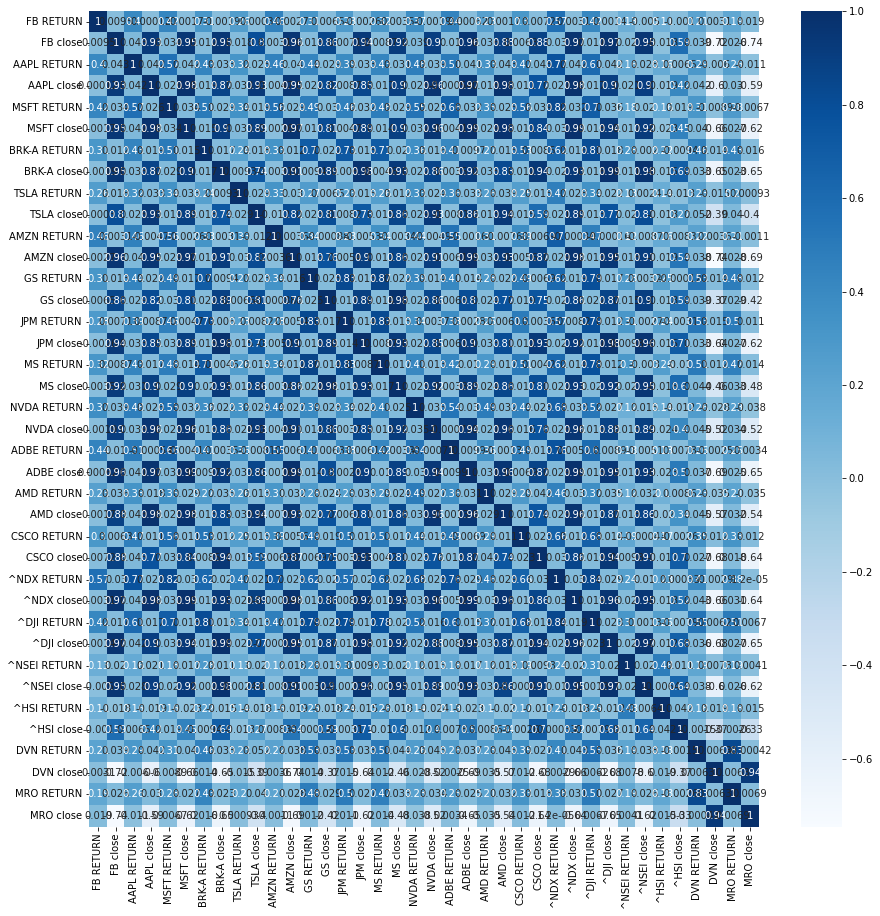

In [ ]:
#heatmap with all technical indicaotrs
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),cmap='Blues',annot=True)

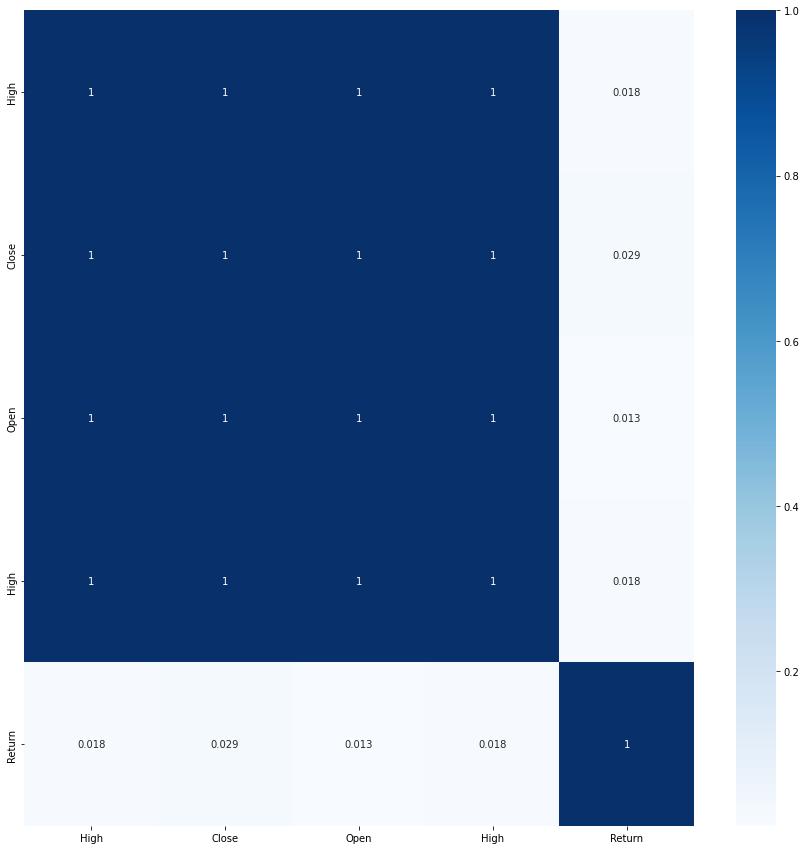

In [ ]:
#heatmap with all technical indicaotrs
plt.figure(figsize=(15,15))
sns.heatmap(basics.corr(),cmap='Blues',annot=True)

In [ ]:
df.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(60,60))

# Feature Engineering

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
#Data Partitioning

In [ ]:
def get_feature_importance_data_train(data1):
    data = data1.copy()
    y = data['Close']
    X = data.iloc[:, 1:]
    train_samples = int(X.shape[0] * 0.8)
    X_train = X.iloc[:train_samples]
    y_train = y.iloc[:train_samples]
    return (X_train, y_train)

In [ ]:
def get_feature_importance_data_test(data1):
    data = data1.copy()
    y = data['Close']
    X = data.iloc[:, 1:]
    train_samples = int(X.shape[0] * 0.8)
    X_test = X.iloc[train_samples:]
    y_test = y.iloc[train_samples:]
    return (X_test, y_test)

In [ ]:
(X_test_FI, y_test_FI) = get_feature_importance_data_test(df)

In [ ]:
(X_train_FI, y_train_FI) = get_feature_importance_data_train(df)

In [ ]:
#define regressor

In [ ]:
regressor = xgb.XGBRegressor(n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [ ]:
#train regressor

In [ ]:
xgbModel = regressor.fit(X_train_FI,y_train_FI,eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)])

In [ ]:
#model evaluation

In [ ]:
eval_result = regressor.evals_result()

In [ ]:
training_rounds = range(len(eval_result['validation_0']['rmse']))

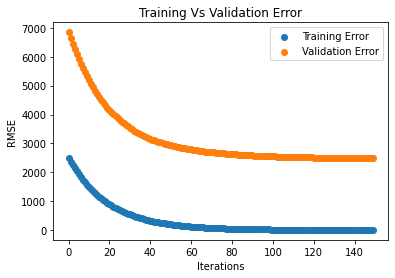

In [ ]:
plt.scatter(x=training_rounds,y=eval_result['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval_result['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

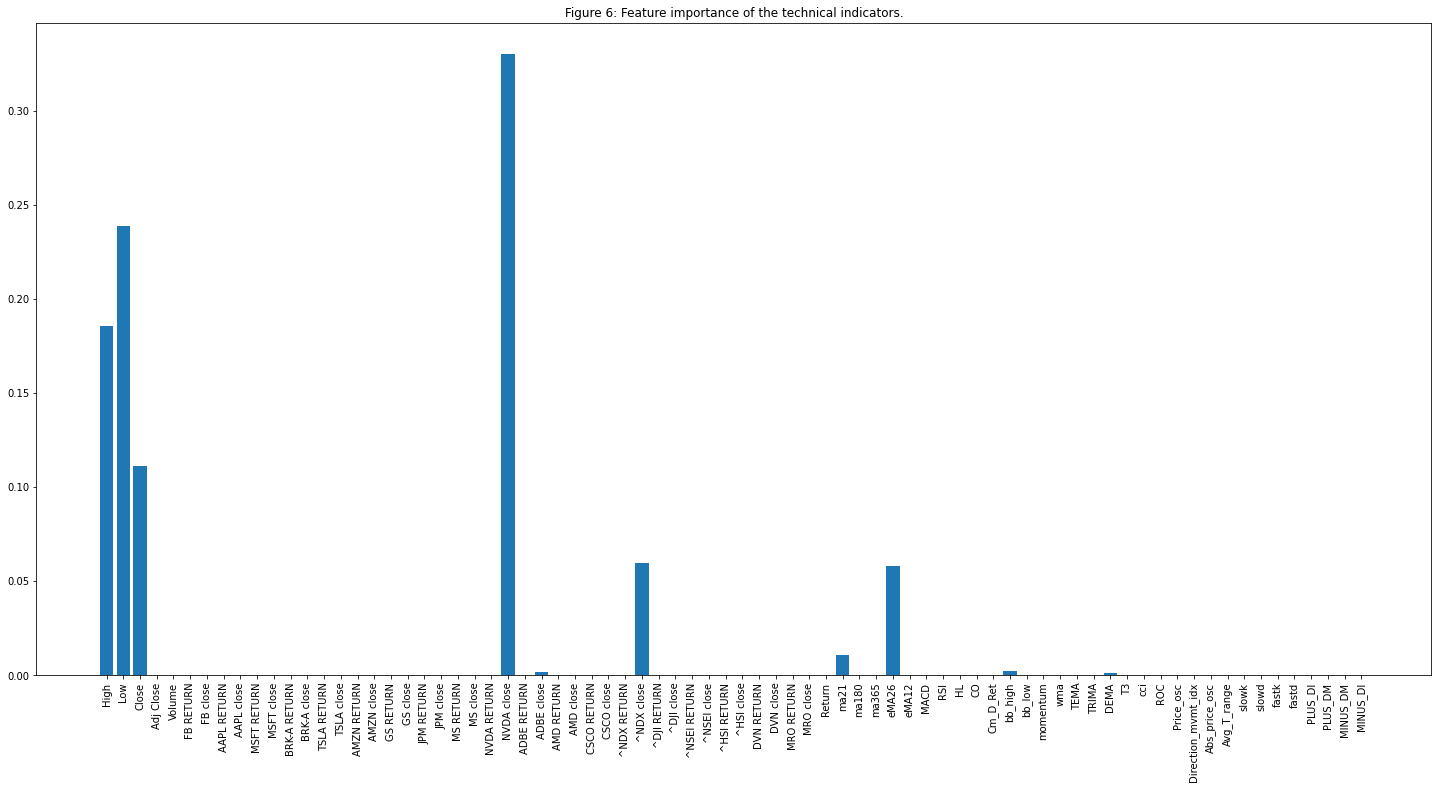

In [ ]:
fig = plt.figure(figsize=(25,12))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 564 kB 4.2 MB/s 


In [ ]:
explainer = shap.TreeExplainer(xgbModel)
shap_values = explainer.shap_values(X_test_FI)

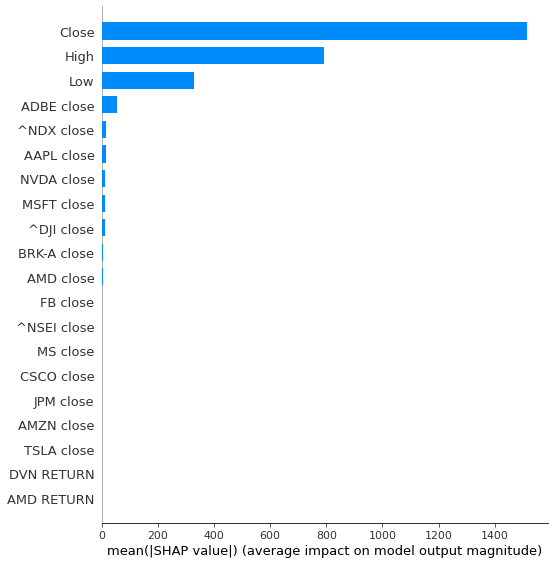

In [ ]:
shap.summary_plot(shap_values, X_test_FI, plot_type="bar")


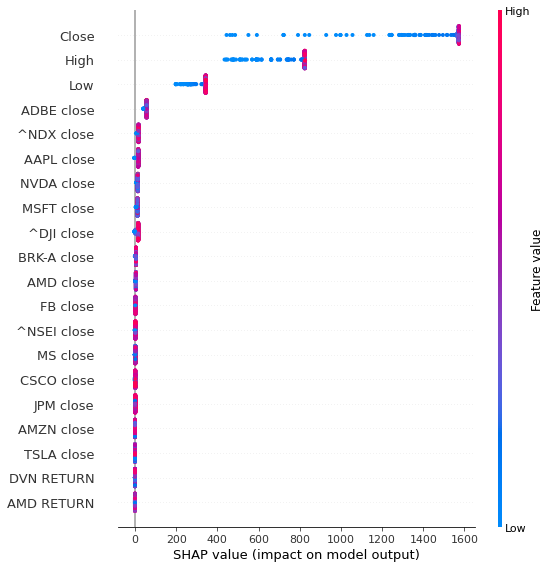

In [ ]:
shap.summary_plot(shap_values, X_test_FI)


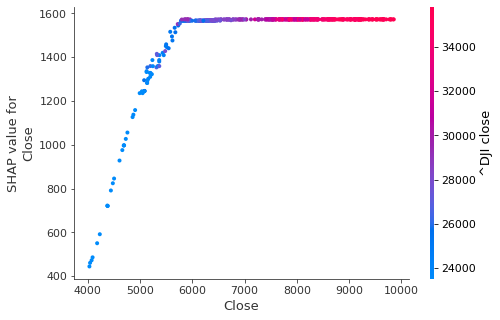

In [ ]:
shap.dependence_plot("Close", shap_values, X_test_FI)


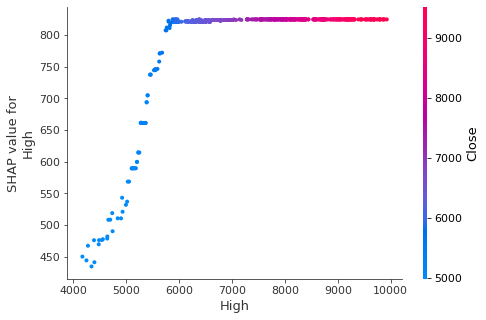

In [ ]:
shap.dependence_plot("High", shap_values, X_test_FI)

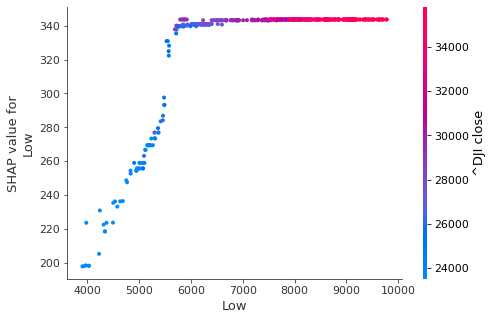

In [ ]:
shap.dependence_plot("Low", shap_values, X_test_FI)

In [ ]:
shap.dependence_plot("ma21", shap_values, X_test_FI)

invalid value encountered in true_divide
invalid value encountered in true_divide


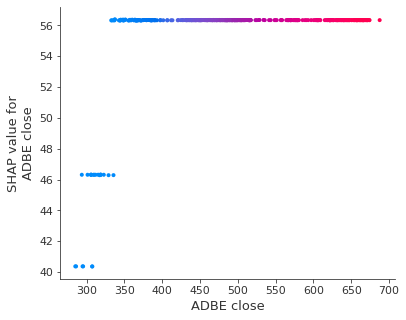

In [ ]:
shap.dependence_plot("ADBE close", shap_values, X_test_FI)

In [ ]:
features = ['Open','High','Low','Close','ADBE close','ma21']

In [ ]:
final_features = df[features]

In [ ]:
final_features

,Open,High,Low,Close,ADBE close,ma21
Date,,,,,,
2012-05-22,1342.500000,1346.459961,1329.089966,1337.569946,32.009998,0.000000
2012-05-23,1333.829956,1343.099976,1311.969971,1339.969971,32.180000,0.000000
2012-05-24,1337.180054,1337.810059,1308.810059,1317.589966,31.540001,0.000000
2012-05-25,1318.180054,1330.439941,1318.170044,1324.310059,31.600000,0.000000
2012-05-29,1330.599976,1349.819946,1329.689941,1342.479980,32.049999,0.000000
...,...,...,...,...,...,...
2021-12-22,9391.730469,9510.290039,9354.349609,9508.169922,563.979980,9407.259022
2021-12-23,9523.299805,9619.459961,9509.780273,9584.750000,569.619995,9409.405692
2021-12-28,9790.929688,9793.419922,9629.860352,9657.730469,569.359985,9412.359515


In [ ]:
data_features =  df.copy()
data_features = data_features.sort_values(by = ['Date'])
date_index = df.index
data_features = data_features.reset_index()
data_features = data_features.drop(['Date'], axis = 1)
important_features = data_features[features]
final_features = important_features.copy()
final_features['Prediction'] = final_features['Close']
final_features

,Open,High,Low,Close,ADBE close,ma21,Prediction
0,1342.500000,1346.459961,1329.089966,1337.569946,32.009998,0.000000,1337.569946
1,1333.829956,1343.099976,1311.969971,1339.969971,32.180000,0.000000,1339.969971
2,1337.180054,1337.810059,1308.810059,1317.589966,31.540001,0.000000,1317.589966
3,1318.180054,1330.439941,1318.170044,1324.310059,31.600000,0.000000,1324.310059
4,1330.599976,1349.819946,1329.689941,1342.479980,32.049999,0.000000,1342.479980
...,...,...,...,...,...,...,...
2191,9391.730469,9510.290039,9354.349609,9508.169922,563.979980,9407.259022,9508.169922
2192,9523.299805,9619.459961,9509.780273,9584.750000,569.619995,9409.405692,9584.750000
2193,9790.929688,9793.419922,9629.860352,9657.730469,569.359985,9412.359515,9657.730469
2194,9660.660156,9693.500000,9583.280273,9656.889648,569.289978,9424.471866,9656.889648


Data Pre processing

# Data Processing

In [ ]:
#processing data and making data suitable for training LSTM model
npDataUnscaled = np.array(final_features)
#reshape the data
npDataUnscaled = np.reshape(npDataUnscaled,(final_features.shape[0], -1 ))
#scale all the features b/w 0 and 1
sc = MinMaxScaler()
npDataScaled = sc.fit_transform(npDataUnscaled)
#generate saperate scaler for scling predictions
Scaler = pd.DataFrame(final_features['Close'])
npScalerScaled = sc.fit_transform(Scaler)
windowLen = 50;
index = final_features.columns.get_loc('Close')
trainDataLen = math.ceil(npDataScaled.shape[0] * 0.8)
trainData = npDataScaled[0 : trainDataLen, : ]
testData = npDataScaled[trainDataLen - windowLen: , : ]

In [ ]:
def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]
    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i,:]) 
        #contains sequence_length values 0-sequence_length * columsn
        y.append(data[i, index])
        #contains the prediction values for validation,  for single-step prediction
        #Convert the x and y to numpy arrays
    x = np.array(x)
    y = np.array(y)
    return x, y

In [ ]:
#generate training data
# Generate training data and test data
x_train, y_train = partition_dataset(windowLen, trainData)
x_test, y_test = partition_dataset(windowLen, testData)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1707, 50, 7) (1707,)
(439, 50, 7) (439,)


[link text](https://)Model Training / summary

# All LSTM Model Builds and Compiled Code

In [ ]:
#1 Model 1

In [ ]:
# Configure the neural network model
model_0 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_0.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model_0.add(LSTM(n_neurons, return_sequences=False))
model_0.add(Dense(5))
model_0.add(Dense(1))
model_0.summary()
# Compile the model
model_0.compile(optimizer='adam', loss='mse')

In [ ]:
# Configure the neural network model
model_1 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_1.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_1.add(Dropout(0.2))
model_1.add(Dense(5))
model_1.add(Dense(1))

# Compile the model
model_1.compile(optimizer='adam', loss='mse')

350 50 7


In [ ]:
# Configure the neural network model
model_2 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_2.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_2.add(Dropout(0.2))
model_2.add(LSTM(n_neurons, return_sequences=True))
model_2.add(Dropout(0.2))
model_2.add(LSTM(n_neurons, return_sequences=False))
model_2.add(Dropout(0.2))
model_2.add(Dense(5))
model_2.add(Dense(1))

# Compile the model
model_2.compile(optimizer='adam', loss='mse')

350 50 7


In [ ]:
#4

In [ ]:
# Configure the neural network model
model_3 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_3.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_3.add(Dropout(0.2))
model_3.add(Bidirectional(LSTM(n_neurons, return_sequences=True)))
model_3.add(Dropout(0.2))
model_3.add(Bidirectional(LSTM(n_neurons, return_sequences=False)))
model_3.add(Dropout(0.2))
model_3.add(Dense(5))
model_3.add(Dense(1))

# Compile the model
model_3.compile(optimizer='adam', loss='mse')

350 50 7


In [ ]:
#5

In [ ]:
# Configure the neural network model
model_4 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_4.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model_4.add(Dropout(0.2))
model_4.add(LSTM(n_neurons, return_sequences=True))
model_4.add(Dropout(0.2))
model_4.add(attention(return_sequences=True))
model_4.add(LSTM(n_neurons, return_sequences=False))
model_4.add(Dropout(0.2))
model_4.add(Dense(5))
model_4.add(Dense(1))
model_4.summary()

# Compile the model
model_4.compile(optimizer='adam', loss='mse')

In [ ]:
#6

In [ ]:
# Configure the neural network model
model_5 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_5.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2]))) 
model_5.add(Dropout(0.2))
model_5.add(attention(return_sequences=False))
# model_4.add(LSTM(n_neurons, return_sequences=False))
# model_4.add(Dropout(0.2))
model_5.add(Dense(5))
model_5.add(Dense(1))
model_5.summary()

# Compile the model
model_5.compile(optimizer='adam', loss='mse')

In [ ]:
#7

In [ ]:
# Configure the neural network model
model_6 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_6.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_6.add(Dropout(0.2))
model_6.add(attention(return_sequences=False))
# model_4.add(LSTM(n_neurons, return_sequences=False))
# model_4.add(Dropout(0.2))
model_6.add(Dense(5))
model_6.add(Dense(1))


# Compile the model
model_6.compile(optimizer='adam', loss='mse')

In [ ]:
#8

In [ ]:
# Configure the neural network model
model_7 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_7.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_7.add(Dropout(0.2))
model_7.add(attention(return_sequences=True))
model_7.add(LSTM(n_neurons, return_sequences=True))
model_7.add(Dropout(0.2))
model_7.add(LSTM(n_neurons, return_sequences=False))
model_7.add(Dropout(0.2))
model_7.add(Dense(5))
model_7.add(Dense(1))

# Compile the model
model_7.compile(optimizer='adam', loss='mse')

350 50 7


In [ ]:
#9

In [ ]:
# Configure the neural network model
model_8 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_8.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_8.add(Dropout(0.2))
model_8.add(attention(return_sequences=True))
model_8.add(LSTM(n_neurons, return_sequences=True))
model_8.add(Dropout(0.2))
model_8.add(attention(return_sequences=True))
model_8.add(LSTM(n_neurons, return_sequences=False))
model_8.add(Dropout(0.2))
model_8.add(Dense(5))
model_8.add(Dense(1))

# Compile the model
model_8.compile(optimizer='adam', loss='mse')

350 50 7


In [ ]:
#10

In [ ]:
# Configure the neural network model
model_9 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_9.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_9.add(Dropout(0.2))
model_9.add(attention(return_sequences=True))
model_9.add(Bidirectional(LSTM(n_neurons, return_sequences=True)))
model_9.add(Dropout(0.2))
model_9.add(Bidirectional(LSTM(n_neurons, return_sequences=False)))
model_9.add(Dropout(0.2))
model_9.add(Dense(5))
model_9.add(Dense(1))

# Compile the model
model_9.compile(optimizer='adam', loss='mse')

350 50 7


In [ ]:
#11

In [ ]:
# Configure the neural network model
model_10 = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = x_train.shape[1] * x_train.shape[2]
print(n_neurons, x_train.shape[1], x_train.shape[2])
model_10.add(Bidirectional(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))) 
model_10.add(Dropout(0.2))
model_10.add(attention(return_sequences=True))
model_10.add(Bidirectional(LSTM(n_neurons, return_sequences=True)))
model_10.add(Dropout(0.2))
model_10.add(attention(return_sequences=True))
model_10.add(Bidirectional(LSTM(n_neurons, return_sequences=False)))
model_10.add(Dropout(0.2))
model_10.add(Dense(5))
model_10.add(Dense(1))

# Compile the model
model_10.compile(optimizer='adam', loss='mse')

350 50 7


# All Models Summary  : 


In [ ]:
#0
model_0 = load_model('/content/drive/MyDrive/ML models/StackedLSTM.h5')

In [ ]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 350)           501200    
                                                                 
 lstm_1 (LSTM)               (None, 350)               981400    
                                                                 
 dense (Dense)               (None, 5)                 1755      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,484,361
Trainable params: 1,484,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#1
model_1 = load_model('/content/drive/MyDrive/ML models/BiLSTM.h5')

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 700)              1002400   
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 701       
                                                                 
Total params: 1,003,101
Trainable params: 1,003,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#2
model_2 = load_model('/content/drive/MyDrive/ML models/StackedBiLSTM.h5')

In [ ]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 50, 700)          1002400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 700)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 350)           1471400   
                                                                 
 dropout_1 (Dropout)         (None, 50, 350)           0         
                                                                 
 lstm_2 (LSTM)               (None, 350)               981400    
                                                                 
 dropout_2 (Dropout)         (None, 350)               0         
                                                        

In [ ]:
#2
model_3 = load_model('/content/drive/MyDrive/ML models/StackedAllBiLSTM.h5')

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 50, 700)          1002400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 700)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 700)          2942800   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 700)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 700)              2942800   
 nal)                                                            
                                                        

In [ ]:
with open('/content/drive/MyDrive/ML models/StackedAttnLSTM_pkl' , 'rb') as f:
    model_4 = pickle.load(f)

In [ ]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 350)           501200    
                                                                 
 dropout (Dropout)           (None, 50, 350)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50, 350)           981400    
                                                                 
 dropout_1 (Dropout)         (None, 50, 350)           0         
                                                                 
 attention (attention)       (None, 50, 350)           400       
                                                                 
 lstm_2 (LSTM)               (None, 350)               981400    
                                                                 
 dropout_2 (Dropout)         (None, 350)               0

In [ ]:
with open('/content/drive/MyDrive/ML models/AttnLSTM_pkl' , 'rb') as f:
    model_5 = pickle.load(f)

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 350)           501200    
                                                                 
 dropout (Dropout)           (None, 50, 350)           0         
                                                                 
 attention (attention)       (None, 350)               400       
                                                                 
 dense (Dense)               (None, 5)                 1755      
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 503,361
Trainable params: 503,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
with open('/content/drive/MyDrive/ML models/BiLSTMAttn_pkl' , 'rb') as f:
    model_6 = pickle.load(f)

In [ ]:
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 50, 700)          1002400   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 700)           0         
                                                                 
 attention_1 (attention)     (None, 700)               750       
                                                                 
 dense_2 (Dense)             (None, 5)                 3505      
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,006,661
Trainable params: 1,006,661
Non-trainable params: 0
____________________________________________

In [ ]:
with open('/content/drive/MyDrive/ML models/StackedBiLSTMAttn_pkl' , 'rb') as f:
    model_7 = pickle.load(f)

In [ ]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 50, 700)          1002400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 700)           0         
                                                                 
 attention (attention)       (None, 50, 700)           750       
                                                                 
 lstm_1 (LSTM)               (None, 50, 350)           1471400   
                                                                 
 dropout_1 (Dropout)         (None, 50, 350)           0         
                                                                 
 lstm_2 (LSTM)               (None, 350)               981400    
                                                        

In [ ]:
with open('/content/drive/MyDrive/ML models/StackedBiLSTMMultiAttn_pkl' , 'rb') as f:
    model_8 = pickle.load(f)

In [ ]:
model_8.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 50, 700)          1002400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 700)           0         
                                                                 
 attention (attention)       (None, 50, 700)           750       
                                                                 
 lstm_1 (LSTM)               (None, 50, 350)           1471400   
                                                                 
 dropout_1 (Dropout)         (None, 50, 350)           0         
                                                                 
 attention_1 (attention)     (None, 50, 350)           400       
                                                        

In [ ]:
with open('/content/drive/MyDrive/ML models/StackedMultiBiLSTMAttn_pkl' , 'rb') as f:
    model_9 = pickle.load(f)

In [ ]:
model_9.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 50, 700)          1002400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 700)           0         
                                                                 
 attention (attention)       (None, 50, 700)           750       
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 700)          2942800   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 700)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 700)              2

In [ ]:
with open('/content/drive/MyDrive/ML models/StackedMultiBiLSTMMultiAttn_pkl' , 'rb') as f:
    model_10 = pickle.load(f)

In [ ]:
model_10.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 50, 700)          1002400   
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 50, 700)           0         
                                                                 
 attention (attention)       (None, 50, 700)           750       
                                                                 
 bidirectional_1 (Bidirectio  (None, 50, 700)          2942800   
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 50, 700)           0         
                                                                 
 attention_1 (attention)     (None, 50, 700)           7

# Model Evaluation and performance metrics

In [ ]:
# import pandas as pd
import pandas as pd
# list of strings
# Calling DataFrame constructor on list
errors = pd.DataFrame()
errors

""


In [ ]:
errors['Date'] = date_index

In [ ]:
for i in range(0,1757):
  errors.drop([i],inplace = True)

In [ ]:
errors

,Date
1757,2020-02-10
1758,2020-02-11
1759,2020-02-12
1760,2020-02-13
1761,2020-02-14
...,...
2191,2021-12-22
2192,2021-12-23
2193,2021-12-28
2194,2021-12-29


In [ ]:
def MAE(y_test_unscaled,y_pred):
  MAE = mean_absolute_error(y_test_unscaled, y_pred)
  print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

In [ ]:
def MAPE(y_test_unscaled , y_pred):
   # Mean Absolute Percentage Error (MAPE)
  MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
  print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

In [ ]:
def MDAPE(y_test_unscaled, y_pred):
  # Median Absolute Percentage Error (MDAPE)
 MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
 print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

In [ ]:
def rescaler(y_pred_scaled ,y_test):
 y_pred = sc.inverse_transform(y_pred_scaled)
 y_test_unscaled = sc.inverse_transform(y_test.reshape(-1, 1))
 return y_pred,y_test_unscaled

In [ ]:
def prediction(x_test,model):
 return model.predict(x_test)

In [ ]:
def testing(model , x_test , y_test):
# Get the predicted values
  y_pred_scaled = prediction(x_test,model)
  y_pred ,y_test_unscaled = rescaler(y_pred_scaled,y_test)
  MAE(y_test_unscaled,y_pred)
  MAPE(y_test_unscaled , y_pred)
  MDAPE(y_test_unscaled, y_pred)
  #after getting the prediction metrics, just call the plotter function
  plotter(y_pred,model)


In [ ]:
def err(model , predictionsOnTest):
 name = str(model)
 errors[name] = predictionsOnTest["Difference"]
 return errors

In [ ]:
def predictions(data_filtered_sub,trainDataLen,y_pred):
 valid = data_filtered_sub[trainDataLen:]
 valid.insert(1, "Prediction", y_pred.ravel(), True)
 valid.insert(1, "Difference", valid["Prediction"] - valid["Close"], True)
 return valid

In [ ]:
def trainingDataProcessing(data_filtered_sub, trainDataLen):
 data = data_filtered_sub[:trainDataLen + 1]
 return data

In [ ]:
def processDataVisualization():
  data_filtered_sub = final_features.copy()
  data_filtered_sub['Date'] = date_index
  data_filtered_sub = data_filtered_sub.drop(['Prediction'], axis = 1)
  return data_filtered_sub

In [ ]:
def dateRange(t):
 return pd.Timestamp('today') - timedelta(days=t)

In [ ]:
def visualization(valid,train):
  stockname = "NASDAQ 100 Technology sector index"
    # Visualize the data
  fig, ax1 = plt.subplots(figsize=(22, 10), sharex=True)
  xt = train['Date']; 
  yt = train[["Close"]]
  xv = valid['Date'];
  yv = valid[["Close", "Prediction"]]
  plt.ylabel(stockname, fontsize=18)
  plt.title("Predictions vs Actual Values", fontsize=20)
  plt.plot(xt, yt, color="#039dfc", linewidth=2.0)
  plt.plot(xv, yv["Prediction"], color="#E91D9E", linewidth=2.0)
  plt.plot(xv, yv["Close"], color="black", linewidth=2.0)
  plt.legend(["Train", "Test Predictions", "Actual Values"], loc="upper left")

In [ ]:
#Plot the errors and Error difference
def plotErrors(valid):
  # Create the bar plot with the differences
  x = valid['Date']
  y = valid["Difference"]
  # Create custom color range for positive and negative differences
  valid.loc[y >= 0, 'diff_color'] = "#2BC97A"
  valid.loc[y < 0, 'diff_color'] = "#C92B2B"
  plt.bar(x, y, width=0.8, color=valid['diff_color'])
  plt.grid()
  plt.show()

In [ ]:
def plotter(y_pred , model):
  t = 2000;
  display_start_date = dateRange(t)
  data_filtered_sub = processDataVisualization() 
  trainData = trainingDataProcessing(data_filtered_sub , trainDataLen)
  predictionsOnTest = predictions(data_filtered_sub , trainDataLen , y_pred)
  errors = err(model,predictionsOnTest)
  # Zoom in to a closer timeframe
  predictionsOnTest = predictionsOnTest[predictionsOnTest['Date'] > display_start_date]
  trainData = trainData[trainData['Date'] > display_start_date]
  stockname = "NASDAQ TECH"
  #Data Visualization :
  visualization(predictionsOnTest,trainData)
  #Error Plotting : 
  plotErrors(predictionsOnTest)

Median Absolute Error (MAE): 154.74
Mean Absolute Percentage Error (MAPE): 2.15 %
Median Absolute Percentage Error (MDAPE): 1.76 %


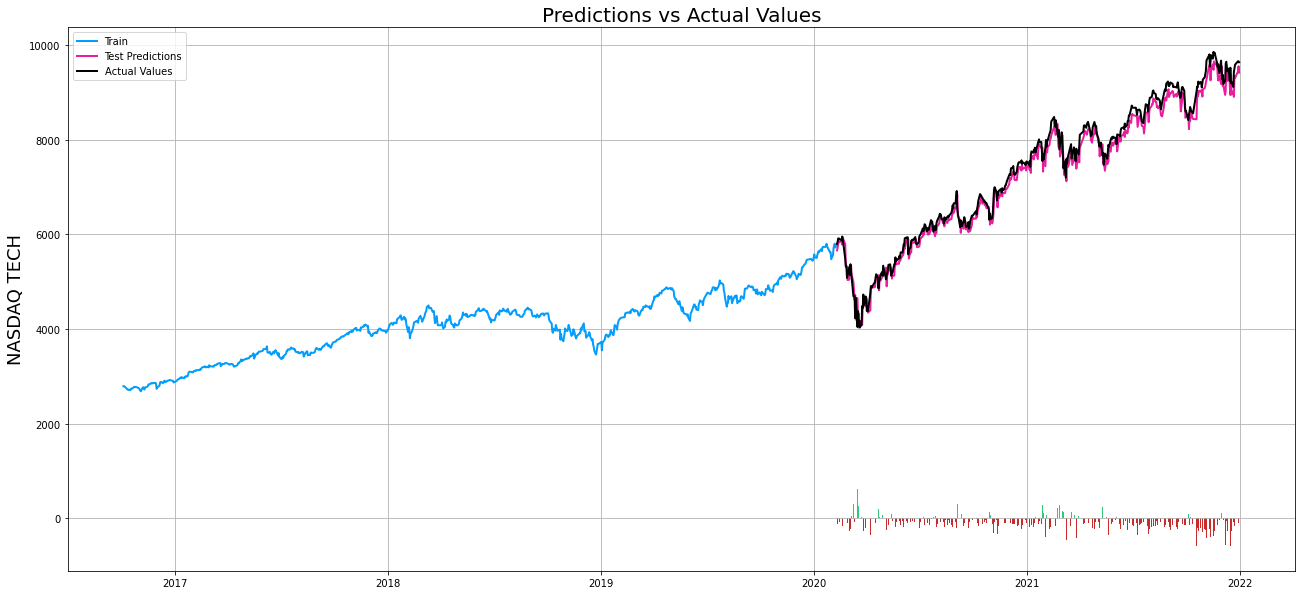

In [ ]:
testing(model_0,x_test,y_test)

Median Absolute Error (MAE): 117.51
Mean Absolute Percentage Error (MAPE): 1.67 %
Median Absolute Percentage Error (MDAPE): 1.18 %


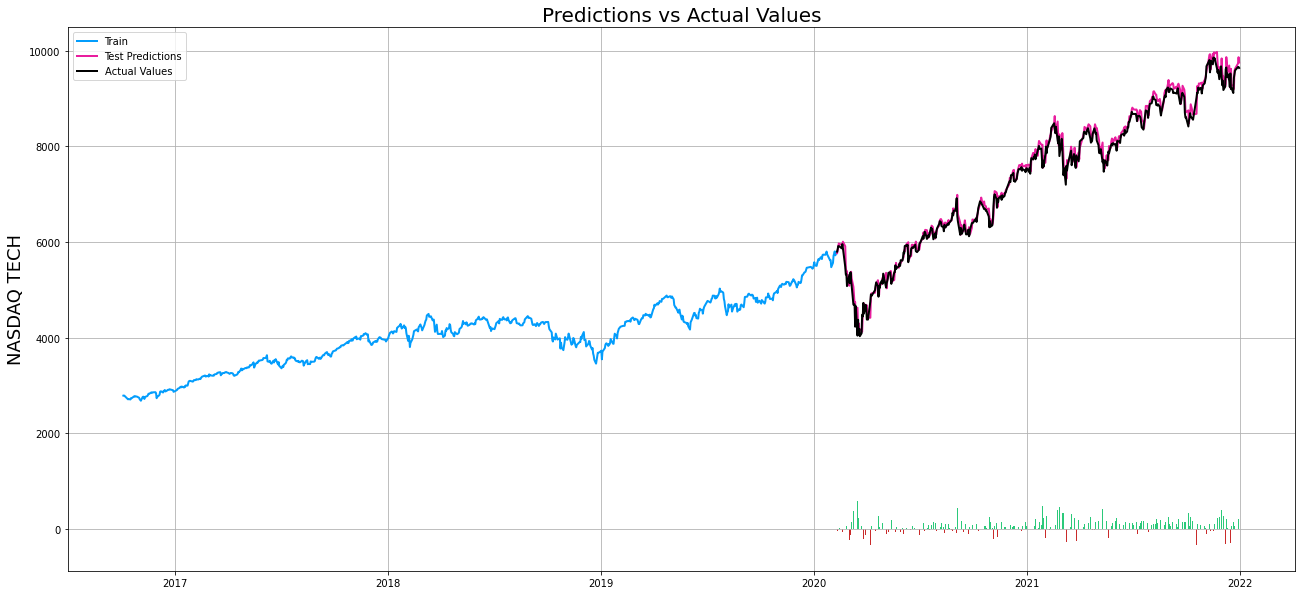

In [ ]:
testing(model_1,x_test,y_test)

Median Absolute Error (MAE): 148.56
Mean Absolute Percentage Error (MAPE): 2.2 %
Median Absolute Percentage Error (MDAPE): 1.68 %


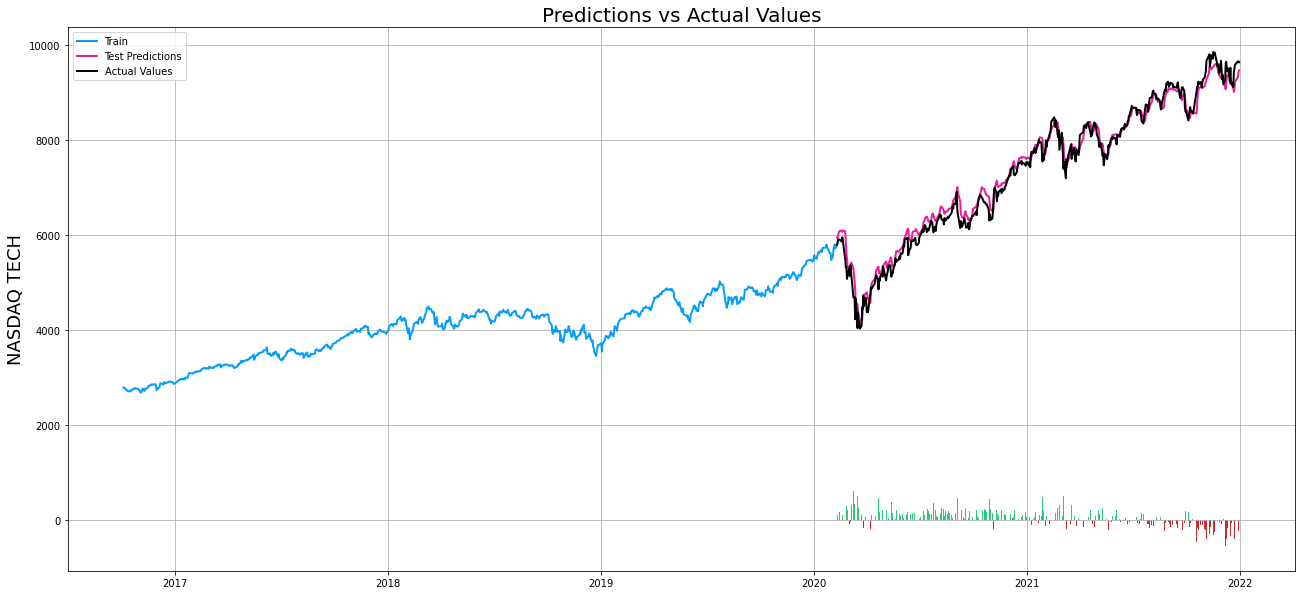

In [ ]:
testing(model_2,x_test,y_test)

Median Absolute Error (MAE): 179.11
Mean Absolute Percentage Error (MAPE): 2.49 %
Median Absolute Percentage Error (MDAPE): 2.28 %


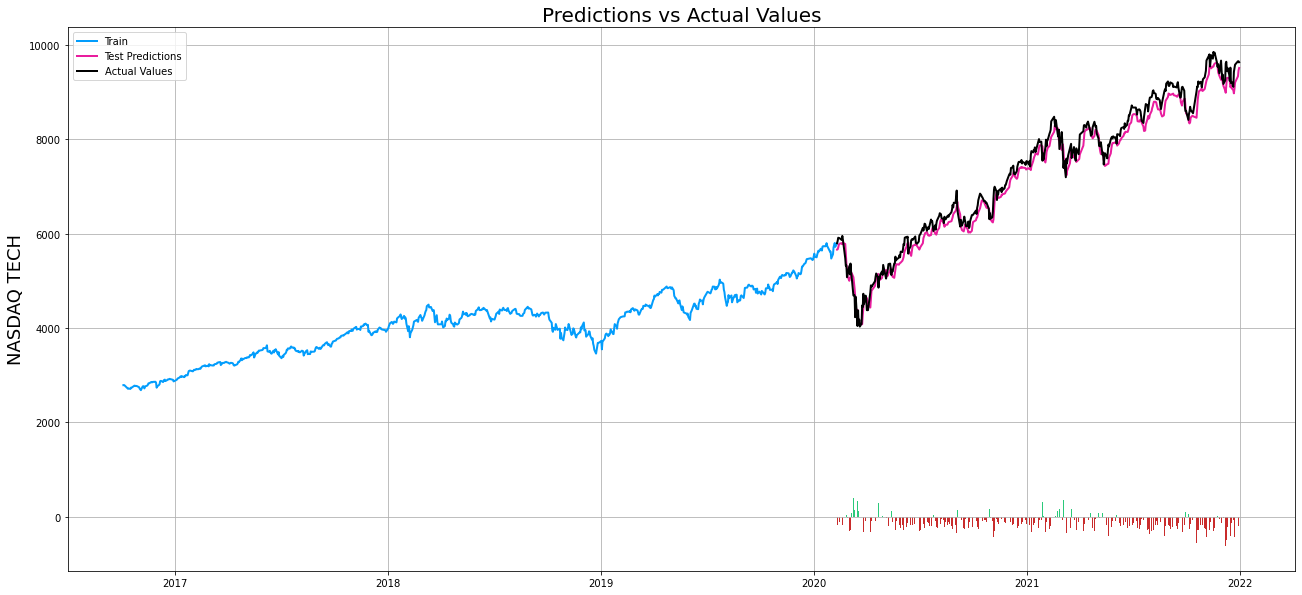

In [ ]:
testing(model_3,x_test,y_test)

Median Absolute Error (MAE): 427.59
Mean Absolute Percentage Error (MAPE): 5.39 %
Median Absolute Percentage Error (MDAPE): 5.35 %


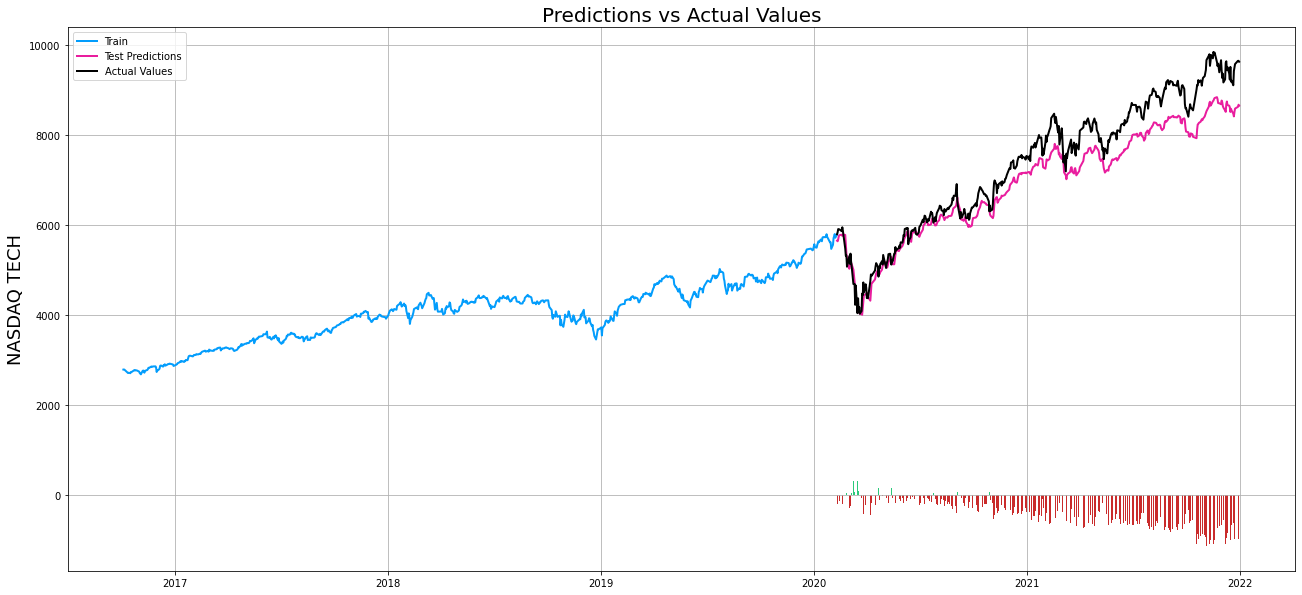

In [ ]:
testing(model_4,x_test,y_test)

Median Absolute Error (MAE): 347.49
Mean Absolute Percentage Error (MAPE): 4.56 %
Median Absolute Percentage Error (MDAPE): 4.1 %


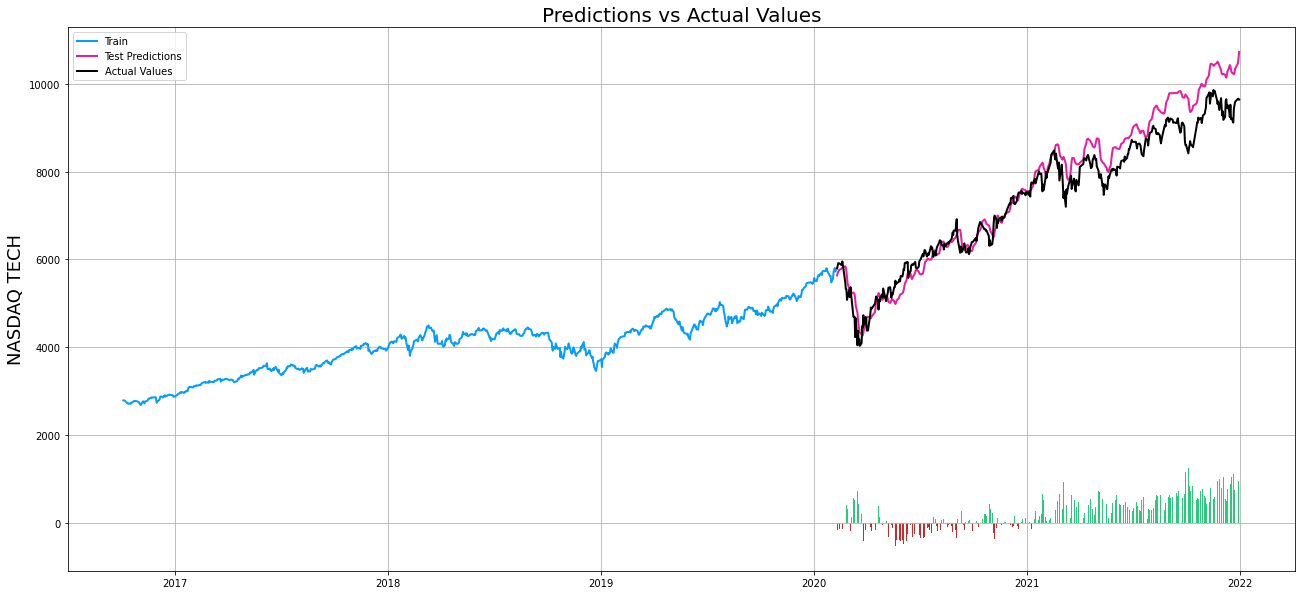

In [ ]:
testing(model_5,x_test,y_test)

Median Absolute Error (MAE): 235.71
Mean Absolute Percentage Error (MAPE): 3.2 %
Median Absolute Percentage Error (MDAPE): 2.93 %


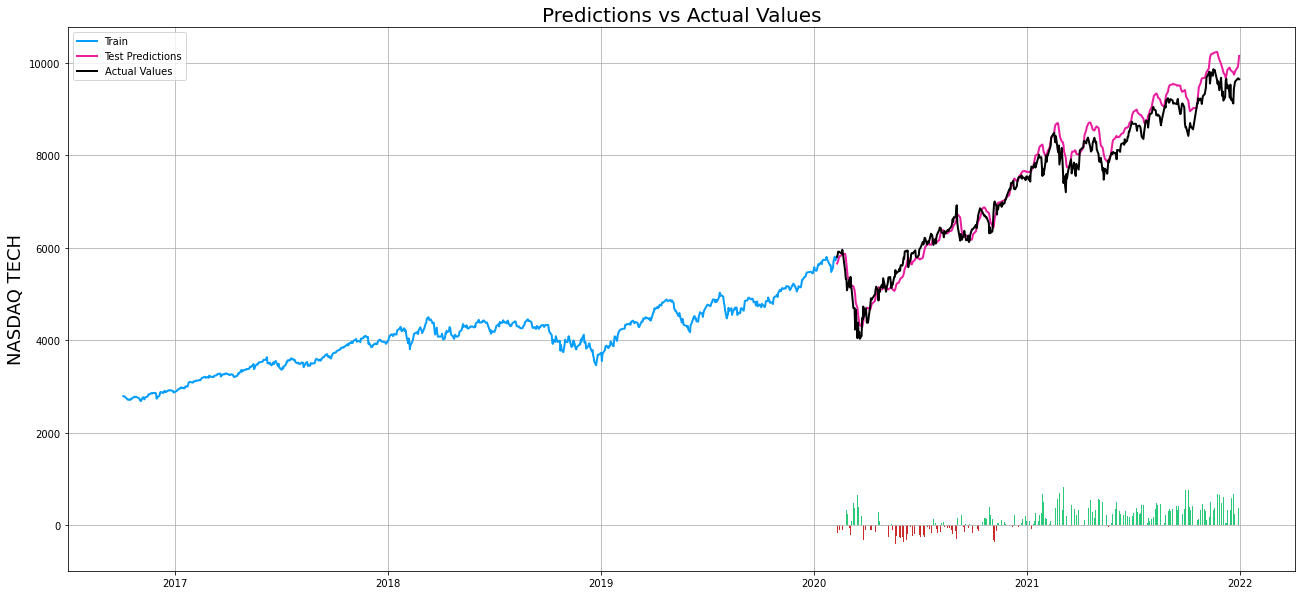

In [ ]:
testing(model_6,x_test,y_test)

Median Absolute Error (MAE): 428.98
Mean Absolute Percentage Error (MAPE): 5.23 %
Median Absolute Percentage Error (MDAPE): 4.38 %


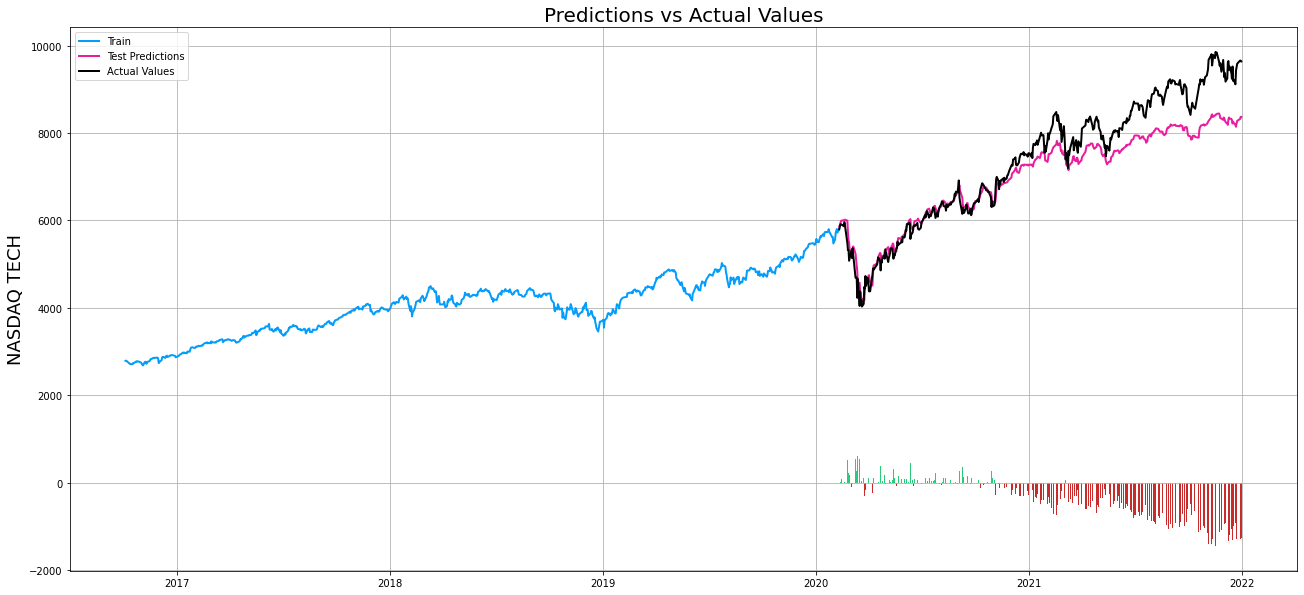

In [ ]:
testing(model_7,x_test,y_test)

Median Absolute Error (MAE): 548.39
Mean Absolute Percentage Error (MAPE): 6.74 %
Median Absolute Percentage Error (MDAPE): 6.65 %


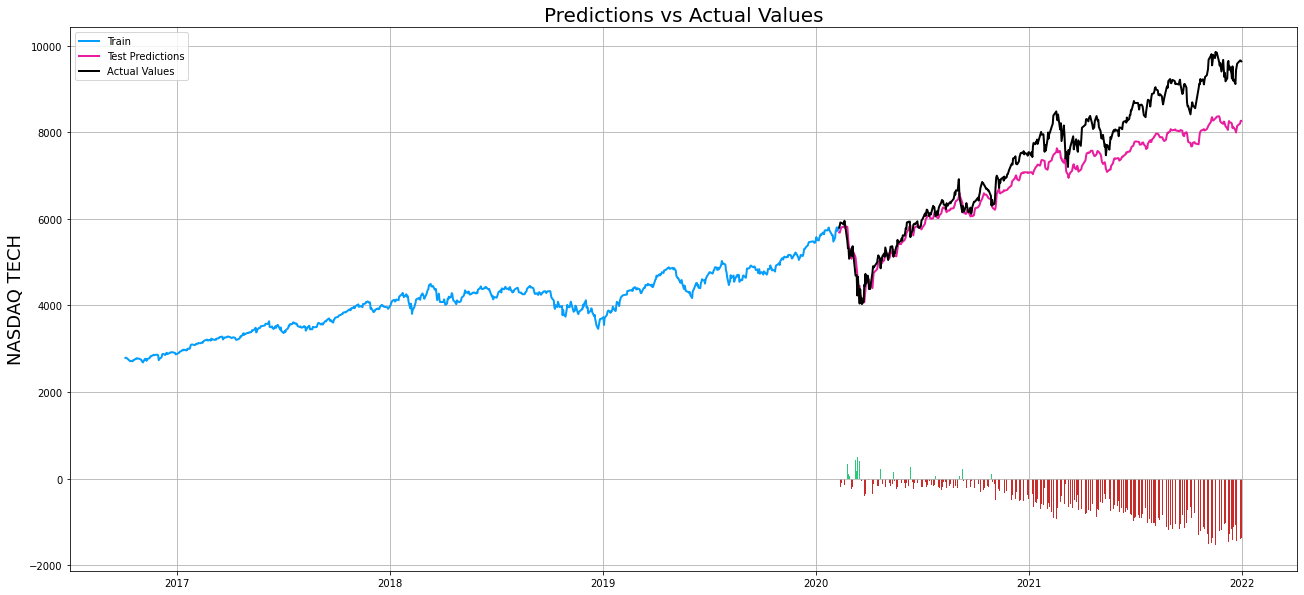

In [ ]:
testing(model_8,x_test,y_test)

Median Absolute Error (MAE): 653.4
Mean Absolute Percentage Error (MAPE): 8.21 %
Median Absolute Percentage Error (MDAPE): 7.79 %


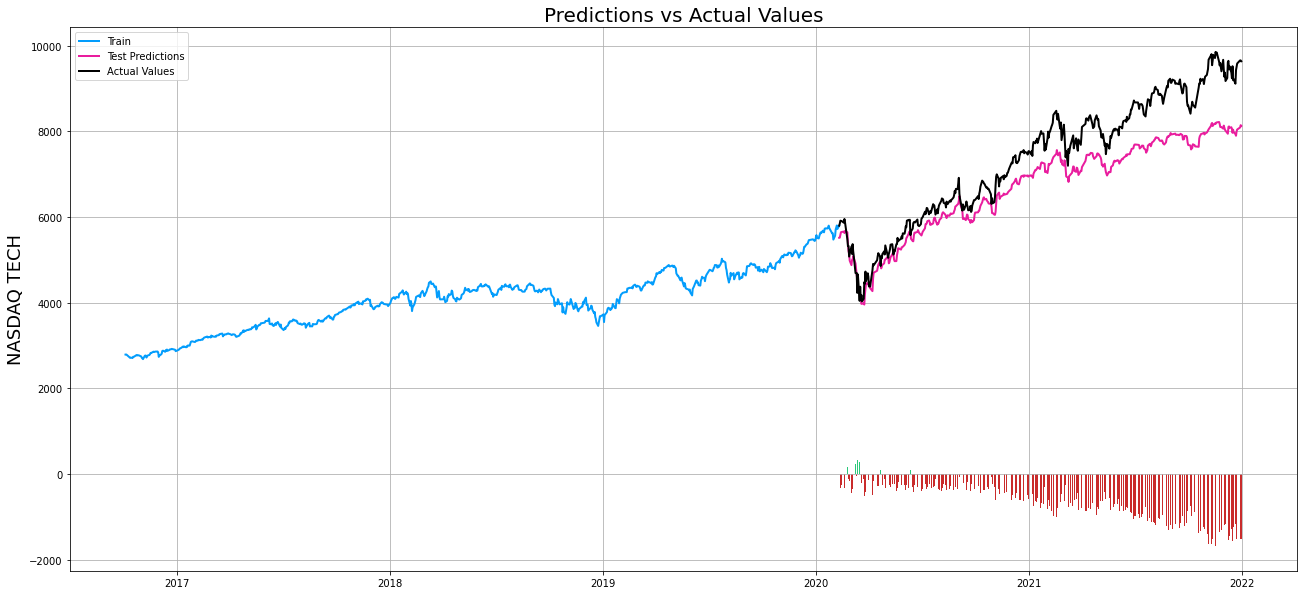

In [ ]:
testing(model_9,x_test,y_test)

Median Absolute Error (MAE): 137.15
Mean Absolute Percentage Error (MAPE): 1.96 %
Median Absolute Percentage Error (MDAPE): 1.6 %


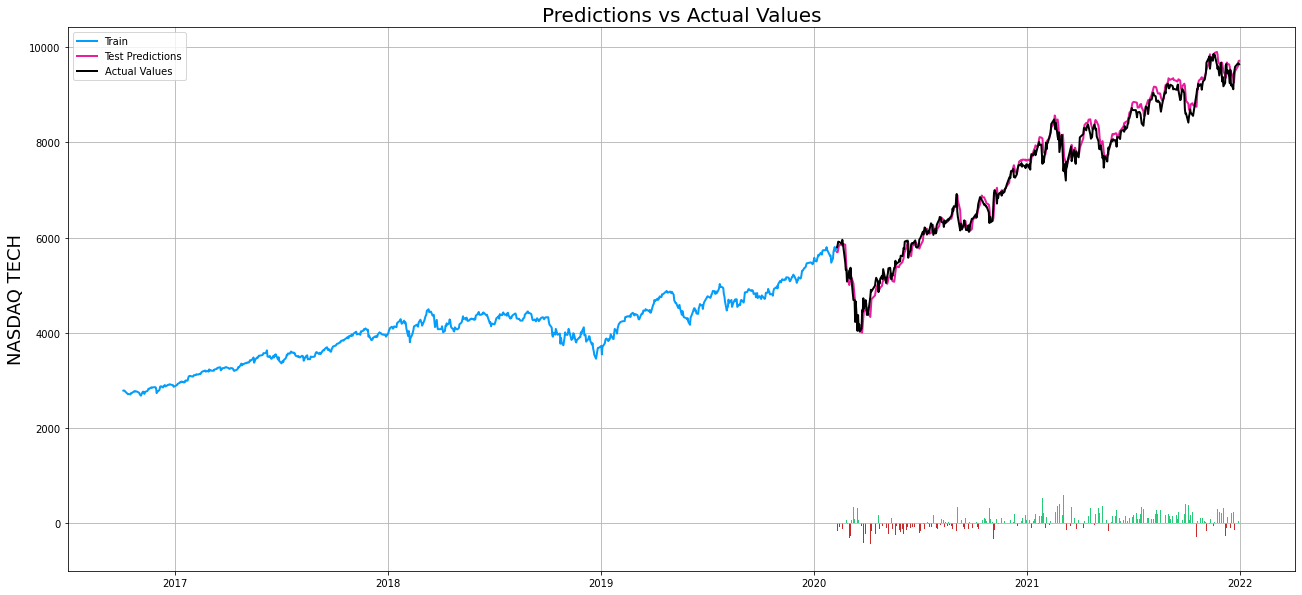

In [ ]:
testing(model_10,x_test,y_test)

# Error Analysis

In [ ]:
errors

,Date,<keras.engine.sequential.Sequential object at 0x7f61c3cf2410>,<keras.engine.sequential.Sequential object at 0x7f61c735ee50>,<keras.engine.sequential.Sequential object at 0x7f61c36c8510>,<keras.engine.sequential.Sequential object at 0x7f61c36c81d0>,<keras.engine.sequential.Sequential object at 0x7f61c2c8fc90>,<keras.engine.sequential.Sequential object at 0x7f61cba06890>,<keras.engine.sequential.Sequential object at 0x7f61c2c5b190>,<keras.engine.sequential.Sequential object at 0x7f61c6822c10>,<keras.engine.sequential.Sequential object at 0x7f61c3b1ead0>,<keras.engine.sequential.Sequential object at 0x7f61bde42090>,<keras.engine.sequential.Sequential object at 0x7f61c4ae6fd0>
1757,2020-02-10,-137.952148,-32.034180,149.232422,-135.513672,-142.431641,-165.269531,-142.341309,63.238770,-112.995117,-282.883789,-101.739746
1758,2020-02-11,-124.397461,-38.669922,99.628418,-179.962402,-204.334961,-164.516113,-165.492676,15.754883,-166.596680,-329.348633,-154.147461
1759,2020-02-12,-98.240723,-5.922363,80.105469,-207.262695,-224.328125,-201.174805,-193.761719,11.071289,-188.604980,-330.292480,-164.042480
1760,2020-02-13,-43.422363,61.175293,151.149414,-145.747559,-152.820801,-170.772949,-139.029785,77.461914,-124.848633,-264.152344,-89.105957
1761,2020-02-14,-75.536621,32.851074,177.350098,-119.400391,-129.219238,-143.336914,-98.360352,88.222168,-102.783691,-257.279785,-64.312500
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,2021-12-22,-157.881836,67.894531,-402.931641,-435.047852,-987.175781,740.052734,242.689453,-1285.884766,-1441.036621,-1507.067871,-138.051758
2192,2021-12-23,-280.498047,34.648438,-359.987305,-377.939453,-989.621094,751.544922,224.795898,-1307.553711,-1439.165527,-1541.398438,-90.629883
2193,2021-12-28,-215.209961,71.902344,-325.188477,-318.942383,-1024.400391,805.752930,251.910156,-1335.923828,-1455.760742,-1566.624512,-60.315430
2194,2021-12-29,-103.981445,204.944336,-219.433594,-192.492188,-976.391602,945.778320,381.362305,-1284.339844,-1393.447266,-1511.536133,47.526367


In [ ]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1757 to 2195
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           439 non-null    datetime64[ns]
 1   <keras.engine.sequential.Sequential object at 0x7f61c3cf2410>  439 non-null    float64       
 2   <keras.engine.sequential.Sequential object at 0x7f61c735ee50>  439 non-null    float64       
 3   <keras.engine.sequential.Sequential object at 0x7f61c36c8510>  439 non-null    float64       
 4   <keras.engine.sequential.Sequential object at 0x7f61c36c81d0>  439 non-null    float64       
 5   <keras.engine.sequential.Sequential object at 0x7f61c2c8fc90>  439 non-null    float64       
 6   <keras.engine.sequential.Sequential object at 0x7f61cba06890>  439 non-null    float64       


In [ ]:
errors.rename(columns = {'<keras.engine.sequential.Sequential object at 0x7f61c3cf2410>':'StackedLSTM',
                              '<keras.engine.sequential.Sequential object at 0x7f61c735ee50>':'BiLSTM',
                              '<keras.engine.sequential.Sequential object at 0x7f61c36c8510>':'stackedBiLSTM',
                              '<keras.engine.sequential.Sequential object at 0x7f61c36c81d0>':'StackedAllBiLSTM',
                              '<keras.engine.sequential.Sequential object at 0x7f61c2c8fc90>':'StackedAttnLSTM',
                              '<keras.engine.sequential.Sequential object at 0x7f61cba06890>':'AttnLSTM',
                              '<keras.engine.sequential.Sequential object at 0x7f61c2c5b190>':'BiLSTMAttn',
                              '<keras.engine.sequential.Sequential object at 0x7f61c6822c10>':'StackedBiLSTMAttn',
                              '<keras.engine.sequential.Sequential object at 0x7f61c3b1ead0>':'StackedBiLSTMMultiAttn',
                              '<keras.engine.sequential.Sequential object at 0x7f61bde42090>':'StackedMultiBiLSTMAttn',
                              '<keras.engine.sequential.Sequential object at 0x7f61c4ae6fd0>':'StackedMultiBiLSTMMultiAttn'
                              }, inplace = True)

In [ ]:
errors

,Date,StackedLSTM,BiLSTM,stackedBiLSTM,StackedAllBiLSTM,StackedAttnLSTM,AttnLSTM,BiLSTMAttn,StackedBiLSTMAttn,StackedBiLSTMMultiAttn,StackedMultiBiLSTMAttn,StackedMultiBiLSTMMultiAttn
1757,2020-02-10,-137.952148,-32.034180,149.232422,-135.513672,-142.431641,-165.269531,-142.341309,63.238770,-112.995117,-282.883789,-101.739746
1758,2020-02-11,-124.397461,-38.669922,99.628418,-179.962402,-204.334961,-164.516113,-165.492676,15.754883,-166.596680,-329.348633,-154.147461
1759,2020-02-12,-98.240723,-5.922363,80.105469,-207.262695,-224.328125,-201.174805,-193.761719,11.071289,-188.604980,-330.292480,-164.042480
1760,2020-02-13,-43.422363,61.175293,151.149414,-145.747559,-152.820801,-170.772949,-139.029785,77.461914,-124.848633,-264.152344,-89.105957
1761,2020-02-14,-75.536621,32.851074,177.350098,-119.400391,-129.219238,-143.336914,-98.360352,88.222168,-102.783691,-257.279785,-64.312500
...,...,...,...,...,...,...,...,...,...,...,...,...
2191,2021-12-22,-157.881836,67.894531,-402.931641,-435.047852,-987.175781,740.052734,242.689453,-1285.884766,-1441.036621,-1507.067871,-138.051758
2192,2021-12-23,-280.498047,34.648438,-359.987305,-377.939453,-989.621094,751.544922,224.795898,-1307.553711,-1439.165527,-1541.398438,-90.629883
2193,2021-12-28,-215.209961,71.902344,-325.188477,-318.942383,-1024.400391,805.752930,251.910156,-1335.923828,-1455.760742,-1566.624512,-60.315430
2194,2021-12-29,-103.981445,204.944336,-219.433594,-192.492188,-976.391602,945.778320,381.362305,-1284.339844,-1393.447266,-1511.536133,47.526367


In [ ]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 439 entries, 1757 to 2195
Data columns (total 12 columns):
 #   Column                                                         Non-Null Count  Dtype         
---  ------                                                         --------------  -----         
 0   Date                                                           439 non-null    datetime64[ns]
 1   <keras.engine.sequential.Sequential object at 0x7f61c3cf2410>  439 non-null    float64       
 2   <keras.engine.sequential.Sequential object at 0x7f61c735ee50>  439 non-null    float64       
 3   <keras.engine.sequential.Sequential object at 0x7f61c36c8510>  439 non-null    float64       
 4   <keras.engine.sequential.Sequential object at 0x7f61c36c81d0>  439 non-null    float64       
 5   <keras.engine.sequential.Sequential object at 0x7f61c2c8fc90>  439 non-null    float64       
 6   <keras.engine.sequential.Sequential object at 0x7f61cba06890>  439 non-null    float64       


In [ ]:
errors.to_csv('errors.csv')

In [ ]:
errors.describe()

,StackedLSTM,BiLSTM,stackedBiLSTM,StackedAllBiLSTM,StackedAttnLSTM,AttnLSTM,BiLSTMAttn,StackedBiLSTMAttn,StackedBiLSTMMultiAttn,StackedMultiBiLSTMAttn,StackedMultiBiLSTMMultiAttn
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,-113.476033,64.476162,56.896217,-144.302606,-411.158517,234.898830,148.734795,-353.420023,-526.351783,-646.844970,48.671643
std,150.845954,140.868794,180.620239,151.952684,300.931624,374.583915,255.136530,455.847297,441.502431,422.209856,167.357980
min,-588.670898,-355.354492,-544.251953,-623.920898,-1137.795898,-528.561523,-449.310059,-1450.181641,-1559.363281,-1682.347168,-474.308350
25%,-205.164551,-18.335205,-56.619141,-236.912598,-641.489502,-65.266357,-36.807861,-672.324219,-852.093262,-932.464111,-67.173096
50%,-118.484375,61.204102,67.375488,-162.380371,-390.871094,193.441406,132.538574,-274.496094,-475.536621,-582.147949,47.526367
75%,-42.211182,142.463379,164.647217,-70.548828,-179.488770,516.642090,325.689697,22.306152,-158.937744,-309.690186,156.187012
max,607.614014,581.811768,635.186035,457.718750,390.128906,1242.054688,820.045898,609.999512,502.786621,318.031738,587.759277


In [ ]:
#I have to train 11 error prediction models

In [ ]:
def TrainTestSplit(errors,column):
  training_data = pd.DataFrame(errors[column][0:int(len(errors)*0.90)])
  testing_data = pd.DataFrame(errors[column][int(len(errors)*0.90) : int(len(errors))])
  return training_data,testing_data

In [ ]:
err_train , err_test = TrainTestSplit(errors,"StackedLSTM")

In [ ]:
print(err_train.shape)
print(err_test.shape)

(395, 1)
(44, 1)


In [ ]:
scalingAgent = MinMaxScaler(feature_range = (0,1))

In [ ]:
training_array = scalingAgent.fit_transform(err_train)

In [ ]:
training_array.shape

(395, 1)

In [ ]:
training_array

In [ ]:
def partitioning(training_array):
  xTrain = []
  yTrain = []
  for i in range(100,training_array.shape[0]):
    xTrain.append(training_array[i-100 : i])
    yTrain.append(training_array[i,0])
  
  xTrain , yTrain = np.array(xTrain),np.array(yTrain)
  return xTrain,yTrain

In [ ]:
xTrain , yTrain = partitioning(training_array)

In [ ]:
# Configure the neural network model
err_model = Sequential()

# Model with n_neurons = inputshape Timestamps, each with x_train.shape[2] variables
n_neurons = xTrain.shape[1] * xTrain.shape[2]
print(n_neurons, xTrain.shape[1], xTrain.shape[2])
err_model.add(LSTM(50, return_sequences=True, input_shape=(xTrain.shape[1], xTrain.shape[2]))) 

err_model.add(LSTM(60, return_sequences=True))

err_model.add(LSTM(80, return_sequences=True))

err_model.add(LSTM(120, return_sequences=False))

err_model.add(Dense(5))
err_model.add(Dense(1))
err_model.summary()
# Compile the model
err_model.compile(optimizer='adam', loss='mse')

100 100 1
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_23 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_24 (LSTM)              (None, 100, 60)           26640     
                                                                 
 lstm_25 (LSTM)              (None, 100, 80)           45120     
                                                                 
 lstm_26 (LSTM)              (None, 120)               96480     
                                                                 
 dense_12 (Dense)            (None, 5)                 605       
                                                                 
 dense_13 (Dense)            (None, 1)                 6         
                                                                 
Total params: 179,251
Trainable params: 179,

In [ ]:
err_model.fit(xTrain,yTrain,epochs = 50)

Epoch 1/50
10/10 [==============================] - 10s 284ms/step - loss: 0.0516
Epoch 2/50
10/10 [==============================] - 3s 285ms/step - loss: 0.0140
Epoch 3/50
10/10 [==============================] - 3s 284ms/step - loss: 0.0118
Epoch 4/50
10/10 [==============================] - 3s 282ms/step - loss: 0.0132
Epoch 5/50
10/10 [==============================] - 3s 286ms/step - loss: 0.0121
Epoch 6/50
10/10 [==============================] - 3s 285ms/step - loss: 0.0119
Epoch 7/50
10/10 [==============================] - 3s 285ms/step - loss: 0.0127
Epoch 8/50
10/10 [==============================] - 3s 281ms/step - loss: 0.0124
Epoch 9/50
10/10 [==============================] - 3s 285ms/step - loss: 0.0121
Epoch 10/50
10/10 [==============================] - 3s 286ms/step - loss: 0.0116
Epoch 11/50
10/10 [==============================] - 3s 280ms/step - loss: 0.0115
Epoch 12/50
10/10 [==============================] - 3s 292ms/step - loss: 0.0120
Epoch 13/50
10/10 [=====

In [ ]:
err_model.save('err_stackedLSTM.h5')

In [ ]:
err_test

,StackedLSTM
2174,-492.724609
2175,107.400391
2176,-99.752930
2177,-233.019531
2178,-27.255859
2179,-299.670898
2180,-575.107422
2181,-52.208984
2182,-78.655273
2183,-275.714844


In [ ]:
err_train.tail(100)

,StackedLSTM
2074,-246.093750
2075,-126.911133
2076,-254.750000
2077,-109.889648
2078,-302.083984
...,...
2169,-261.079102
2170,9.632812
2171,-133.208984
2172,-344.778320


In [ ]:
past_n_days = err_train.tail(100)

In [ ]:
final_testing = past_n_days.append(err_test, ignore_index = True)

In [ ]:
input = scalingAgent.fit_transform(final_testing)

In [ ]:
input

array([[0.61118953],
       [0.30660556],
       [0.74423367],
       [0.43189831],
       [0.61219749],
       [0.6039972 ],
       [0.64975572],
       [0.51021683],
       [0.71502871],
       [0.57804717],
       [0.795773  ],
       [0.29754904],
       [0.7015708 ],
       [0.59555831],
       [0.67478028],
       [0.46152006],
       [0.54388174],
       [0.57658214],
       [0.68722834],
       [0.39354617],
       [0.68187565],
       [0.53321665],
       [0.44171221],
       [0.59538392],
       [0.43055101],
       [0.61733108],
       [0.3695195 ],
       [0.51777557],
       [0.58063034],
       [0.54981994],
       [0.54068347],
       [0.62490493],
       [0.69607142],
       [0.29971165],
       [0.58251656],
       [0.58581808],
       [0.59116447],
       [0.72507996],
       [0.63116926],
       [0.65866428],
       [0.31026468],
       [0.38936891],
       [0.54046186],
       [0.55326248],
       [0.6993465 ],
       [0.32204412],
       [0.47049284],
       [0.470

In [ ]:
input.shape

(144, 1)

In [ ]:
xTest,yTest = partitioning(input)

In [ ]:
xTest.shape

(44, 100, 1)

In [ ]:
yTest.shape

(44,)

Prediction on Test Data

In [ ]:
y_prediction = err_model(xTest)

In [ ]:
y_prediction

<tf.Tensor: shape=(44, 1), dtype=float32, numpy=
array([[0.44551817],
       [0.44342494],
       [0.44137242],
       [0.4396695 ],
       [0.43822426],
       [0.43694502],
       [0.43573564],
       [0.43449104],
       [0.4331389 ],
       [0.43139878],
       [0.4292615 ],
       [0.42687097],
       [0.42482424],
       [0.42304087],
       [0.42142168],
       [0.42010593],
       [0.41887242],
       [0.4177859 ],
       [0.4168184 ],
       [0.41633326],
       [0.4164968 ],
       [0.4170047 ],
       [0.41791168],
       [0.41867527],
       [0.4196066 ],
       [0.4209065 ],
       [0.42245418],
       [0.42434582],
       [0.42629108],
       [0.42751065],
       [0.42807573],
       [0.42832935],
       [0.4283292 ],
       [0.42845225],
       [0.4289581 ],
       [0.42923245],
       [0.4296845 ],
       [0.4302837 ],
       [0.431101  ],
       [0.4315545 ],
       [0.43154976],
       [0.43102494],
       [0.43006784],
       [0.4289922 ]], dtype=float32)>

In [ ]:
y_prediction.shape

TensorShape([44, 1])

In [ ]:
y_test.shape

(439,)

In [ ]:
scalingAgent.scale_

array([0.00128938])

In [ ]:
factor = 1/0.00128938

In [ ]:
y_prediction = y_prediction*factor
yTest = yTest*factor

In [ ]:
yTest

array([377.30378153, 444.12703623, 524.18857464, 297.15728216,
       380.01178985, 362.07916931, 341.00494662, 343.38971269,
       181.46292458, 346.05377569, 363.72565399, 631.18566498,
       192.30081723, 328.54010054, 468.72274395, 209.60062516,
       442.06453584, 327.59185817, 598.30382289, 455.46199928,
       243.89262376, 544.90537539,  95.94630701, 696.0714193 ,
       488.91806023, 355.65143373, 561.41514411, 289.00005407,
        13.5634791 , 536.46201444, 510.01572043, 312.95611324,
       588.5186648 , 504.36728187,  12.02929913, 775.56655137,
       326.04498288, 499.360445  ,  63.14454306, 430.7891431 ,
       308.17290922, 373.46100738, 484.68954381, 369.75983481])

In [ ]:
y_prediction

<tf.Tensor: shape=(44, 1), dtype=float32, numpy=
array([[345.529  ],
       [343.90555],
       [342.3137 ],
       [340.99295],
       [339.87207],
       [338.87994],
       [337.942  ],
       [336.9767 ],
       [335.92804],
       [334.57846],
       [332.92087],
       [331.06683],
       [329.47946],
       [328.09634],
       [326.84055],
       [325.8201 ],
       [324.86343],
       [324.02078],
       [323.27042],
       [322.89413],
       [323.021  ],
       [323.4149 ],
       [324.11832],
       [324.71054],
       [325.43283],
       [326.441  ],
       [327.64133],
       [329.10843],
       [330.6171 ],
       [331.56296],
       [332.00122],
       [332.1979 ],
       [332.19778],
       [332.2932 ],
       [332.68555],
       [332.89832],
       [333.2489 ],
       [333.71362],
       [334.3475 ],
       [334.69922],
       [334.69556],
       [334.2885 ],
       [333.54623],
       [332.712  ]], dtype=float32)>

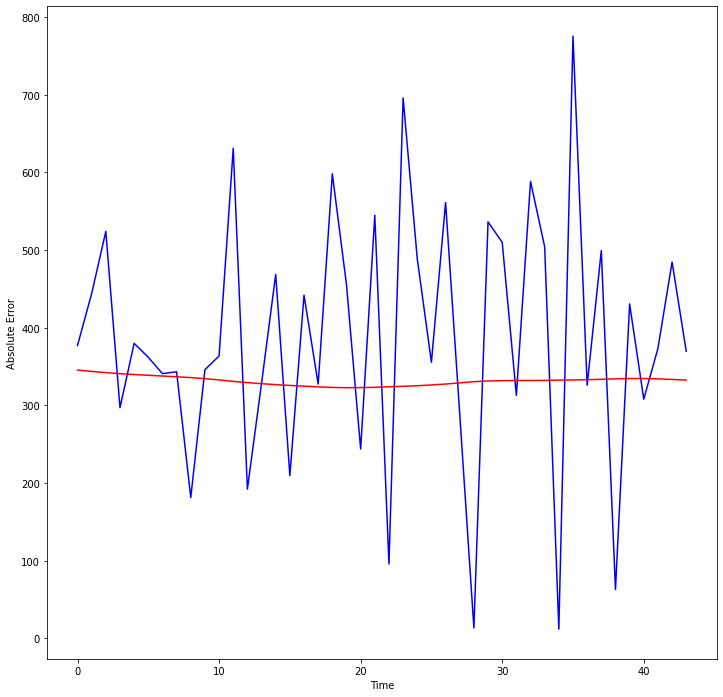

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(yTest,'b',label = 'Actual Error')
plt.plot(y_prediction, 'r' , label = 'Predicted Error')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.show()

In [ ]:
yTest.mean()

386.3404265137679

In [ ]:
        # Get the predicted values
y_pred_scaled = err_model.predict(xTest)

        # Unscale the predicted values
y_pred = sc.inverse_transform(y_pred_scaled)
y_test_unscaled = sc.inverse_transform(yTest.reshape(-1, 1))
y_test_unscaled.shape

        # Mean Absolute Error (MAE)
MAE = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Median Absolute Error (MAE): {np.round(MAE, 2)}')

        # Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print(f'Mean Absolute Percentage Error (MAPE): {np.round(MAPE, 2)} %')

        # Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) ) * 100
print(f'Median Absolute Percentage Error (MDAPE): {np.round(MDAPE, 2)} %')

Median Absolute Error (MAE): 3314024.85
Mean Absolute Percentage Error (MAPE): 99.62 %
Median Absolute Percentage Error (MDAPE): 99.84 %


Streamlit Web app link

Error Prediction using LSTM 

Predicting Error

Predicting Prices using error correction mechanism